In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
from torch.utils.data import DataLoader, Dataset
import numpy as np
from helper import *
import sklearn 

In [2]:
data = torch.from_numpy(getData("Data/rbcL_one_hot_encoding.txt", 50000)).float()

In [3]:
print(data.shape)
sequences = data.flatten(start_dim=1)
print(sequences.shape)

torch.Size([50000, 300, 5])
torch.Size([50000, 1500])


In [4]:
input_size = sequences.shape[1]
hidden_size = 128

def cosine_distance(x, y):
    return 1 - torch.nn.functional.cosine_similarity(x, y)

class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.L1 = nn.Linear(input_size, hidden_size)
        self.R1 = nn.ReLU()
        self.L2 = nn.Linear(hidden_size, hidden_size)
        self.R2 = nn.ReLU()
        self.L3 = nn.Linear(hidden_size, hidden_size)
        

    def forward(self, x):
        # print(x.shape)
        x = self.L1(x)
        # print(x.shape)
        x = self.R1(x)
        # print(x.shape)
        x = self.L2(x)
        # print(x.shape)
        x = self.R2(x)
        # print(x.shape)
        x = self.L3(x)
        # print(x.shape)
        return x

class DNADataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.sequences[idx])

model = Linear()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

dataset = DNADataset(sequences)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

epochs = 20
          
criterion = nn.MSELoss()

losses = []

# for epoch in range(epochs):
#     for batch in dataloader:
#         optimizer.zero_grad()
#         x1, x2 = torch.chunk(batch, 2, dim=0)
#         # print(type(x1[0]))
#         embedded_x1 = model(x1)
#         embedded_x2 = model(x2)

#         target = cosine_distance(x1, x2)

#         real = cosine_distance(embedded_x1, embedded_x2)

#         loss = criterion(target, real)
#         losses.append(loss)

#         loss.backward()
#         optimizer.step()
#     print(f"Batch loss is {loss}")
    
#     print("Training epoch {ep} done".format(ep=epoch))

# torch.save(model.state_dict(), 'linear_one_hot.pth')



In [5]:
model = Linear()
model.load_state_dict(torch.load('linear_one_hot.pth'))
model.eval()

Linear(
  (L1): Linear(in_features=1500, out_features=128, bias=True)
  (R1): ReLU()
  (L2): Linear(in_features=128, out_features=128, bias=True)
  (R2): ReLU()
  (L3): Linear(in_features=128, out_features=128, bias=True)
)

In [6]:
data = getData("Data/rbcL_ordinal_encoding.txt", 50000)
num_clusters = pairWiseCrossValidation(sequences, data, model)

Label 0: Count 4213
Label 1: Count 11577
Label 2: Count 34210
Label 0: Count 10115
Label 1: Count 1441
Label 2: Count 2772
Label 3: Count 35672
Label 0: Count 2772
Label 1: Count 3954
Label 2: Count 34567
Label 3: Count 7266
Label 4: Count 1441
Label 0: Count 4261
Label 1: Count 8540
Label 2: Count 2438
Label 3: Count 12065
Label 4: Count 19924
Label 5: Count 2772
Label 0: Count 14812
Label 1: Count 4227
Label 2: Count 13375
Label 3: Count 2772
Label 4: Count 1741
Label 5: Count 1441
Label 6: Count 11632
Label 0: Count 5339
Label 1: Count 15658
Label 2: Count 2772
Label 3: Count 1004
Label 4: Count 1441
Label 5: Count 10120
Label 6: Count 7825
Label 7: Count 5841
Label 0: Count 1004
Label 1: Count 2772
Label 2: Count 17532
Label 3: Count 2541
Label 4: Count 1741
Label 5: Count 2548
Label 6: Count 1877
Label 7: Count 18544
Label 8: Count 1441
Label 0: Count 3350
Label 1: Count 13420
Label 2: Count 1441
Label 3: Count 1588
Label 4: Count 1741
Label 5: Count 2484
Label 6: Count 11264
Labe

In [7]:
print(num_clusters)

11


In [6]:
num_clusters = 11

In [7]:
cluster_labels, unique_labels = KMeansOnEmbeddings(sequences, model, num_clusters)

Label 0: Count 13365
Label 1: Count 2827
Label 2: Count 1673
Label 3: Count 2772
Label 4: Count 1441
Label 5: Count 11288
Label 6: Count 1001
Label 7: Count 11075
Label 8: Count 2035
Label 9: Count 1741
Label 10: Count 782


In [15]:
print(sequences.shape)
print(data.shape)

torch.Size([50000, 1500])
(50000, 300)


In [16]:
data = torch.from_numpy(getData("Data/rbcL_one_hot_encoding.txt", 50000)).float()

In [17]:
decodeSequencesRange("linear_one_hot", 0, num_clusters, data, one_hot_decoder, unique_labels, cluster_labels)

In [18]:
runClustalRange("linear_one_hot", 0, num_clusters, unique_labels, True)

Using 16 threads
Read 13365 sequences (type: DNA) from clusters/linear_one_hot/cluster_0.fasta
Using 187 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 13365 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 2481864)
Ktuple-distance calculation progress: 7 % (186474 out of 2481864)
Ktuple-distance calculation progress: 8 % (207430 out of 2481864)
Ktuple-distance calculation progress: 9 % (225348 out of 2481864)
Ktuple-distance calculation progress: 15 % (379258 out of 2481864)
Ktuple-distance calculation progress: 16 % (404632 out of 2481864)
Ktuple-distance calculation progress: 17 % (423107 out of 2481864)
Ktuple-distance calculation progress: 19 % (484474 out of 2481864)
Ktuple-distance calculation progress: 22 % (560626 out of 2481864)
Ktuple-distance calculation progress: 23 % (587792 out of 2481864)
Ktuple-distance calculation progress: 24 % (610204 out of 2481864)
Ktuple-distance calcula

In [9]:
percentages = evaluateGapsInRange("linear_one_hot", 0, num_clusters, unique_labels)

clustal/linear_one_hot/cluster_0.clustal
Percentage of gaps in the alignment for cluster 0: 76.95%
clustal/linear_one_hot/cluster_1.clustal
Percentage of gaps in the alignment for cluster 1: 18.72%
clustal/linear_one_hot/cluster_2.clustal
Percentage of gaps in the alignment for cluster 2: 22.63%
clustal/linear_one_hot/cluster_3.clustal
Percentage of gaps in the alignment for cluster 3: 11.40%
clustal/linear_one_hot/cluster_4.clustal
Percentage of gaps in the alignment for cluster 4: 0.84%
clustal/linear_one_hot/cluster_5.clustal
Percentage of gaps in the alignment for cluster 5: 76.32%
clustal/linear_one_hot/cluster_6.clustal
Percentage of gaps in the alignment for cluster 6: 6.95%
clustal/linear_one_hot/cluster_7.clustal
Percentage of gaps in the alignment for cluster 7: 70.75%
clustal/linear_one_hot/cluster_8.clustal
Percentage of gaps in the alignment for cluster 8: 15.96%
clustal/linear_one_hot/cluster_9.clustal
Percentage of gaps in the alignment for cluster 9: 0.84%
clustal/linea

In [20]:
countPercentageLowerThan(percentages, 10)

3

Plot for cluster 0


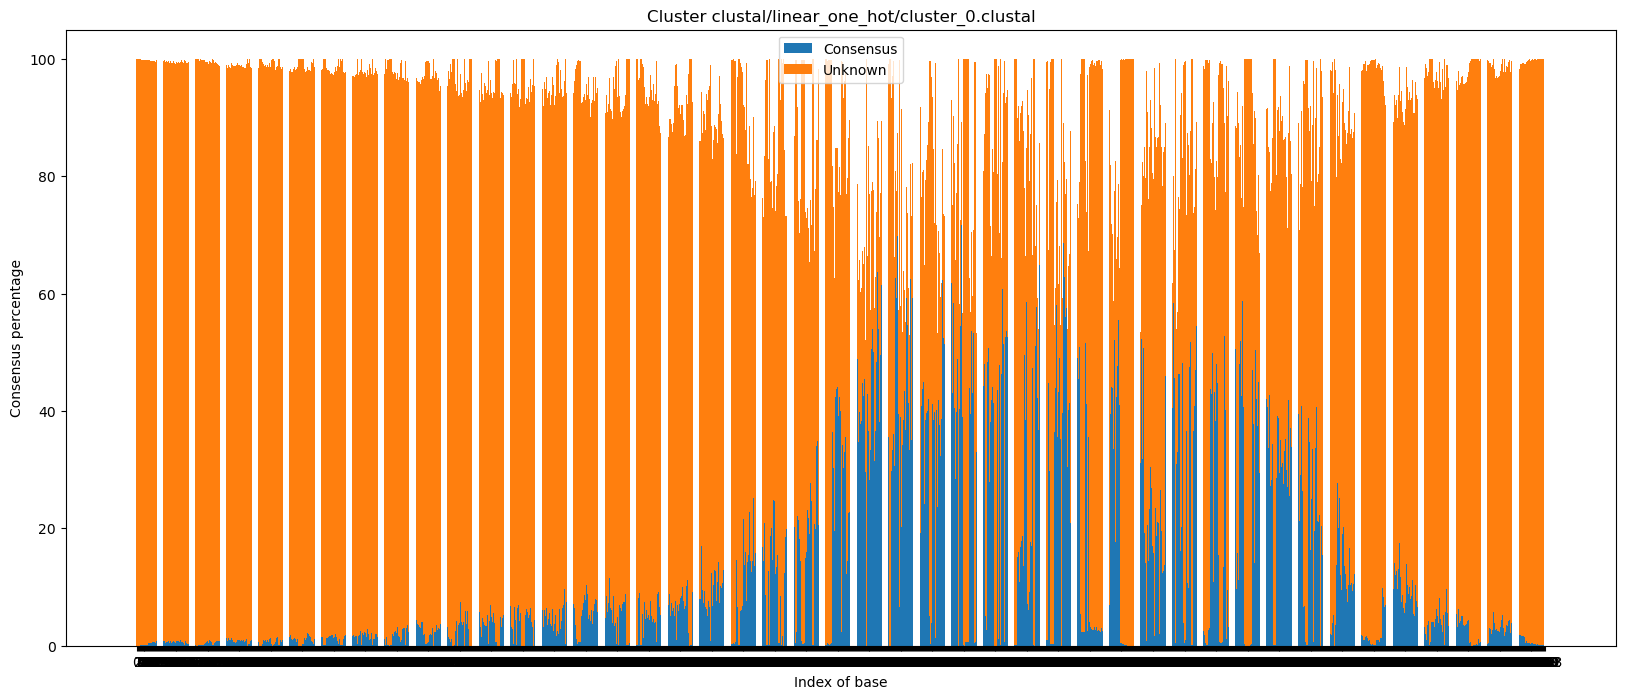

Plot for cluster 1


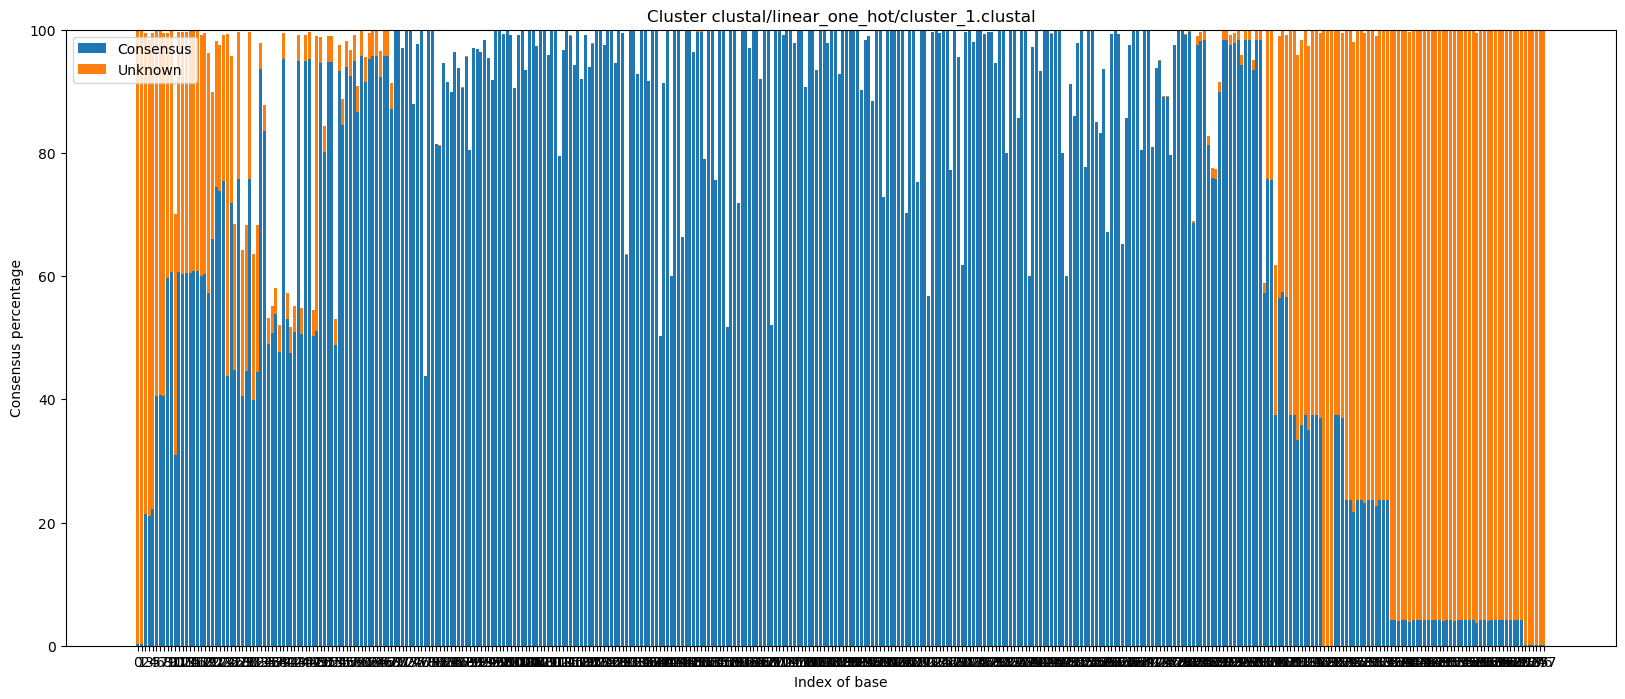

Plot for cluster 2


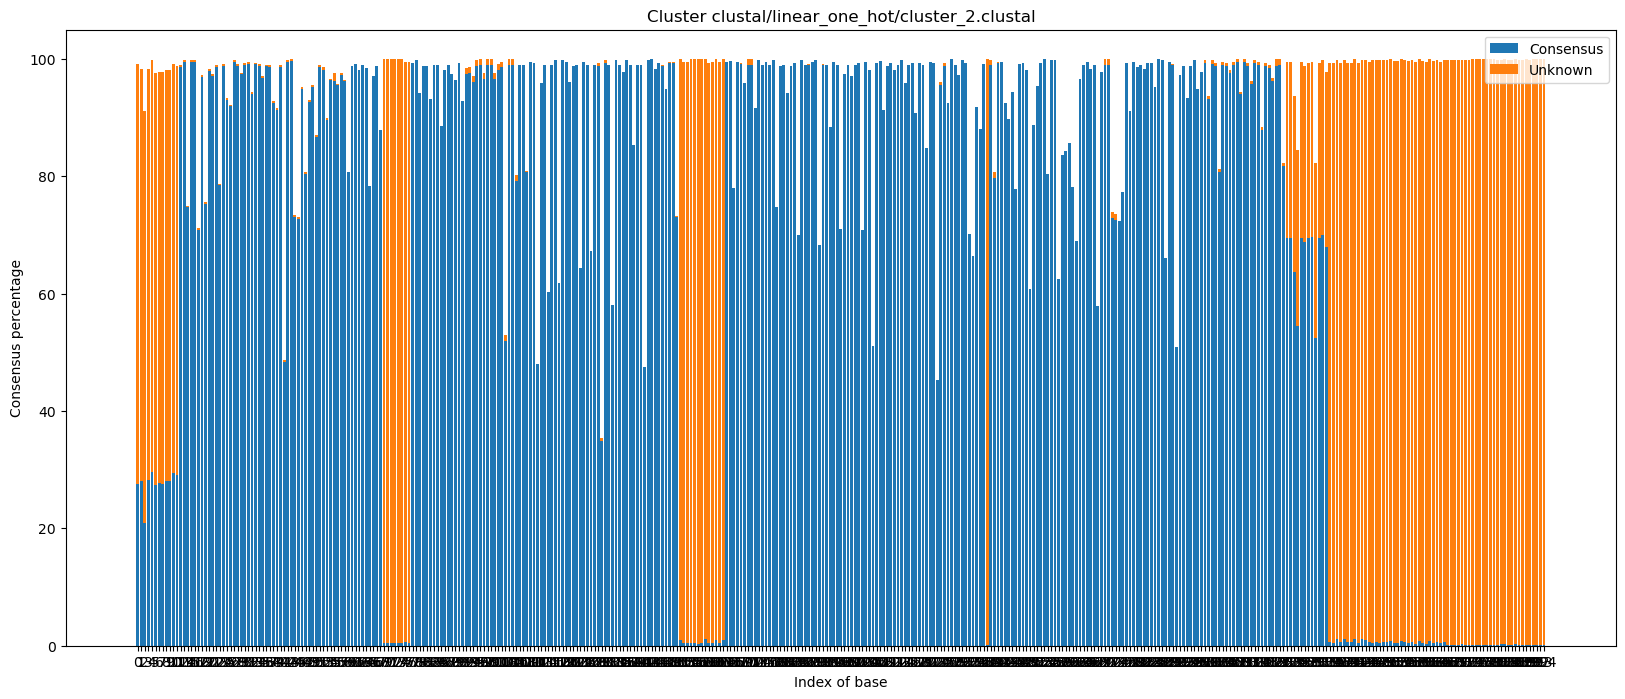

Plot for cluster 3


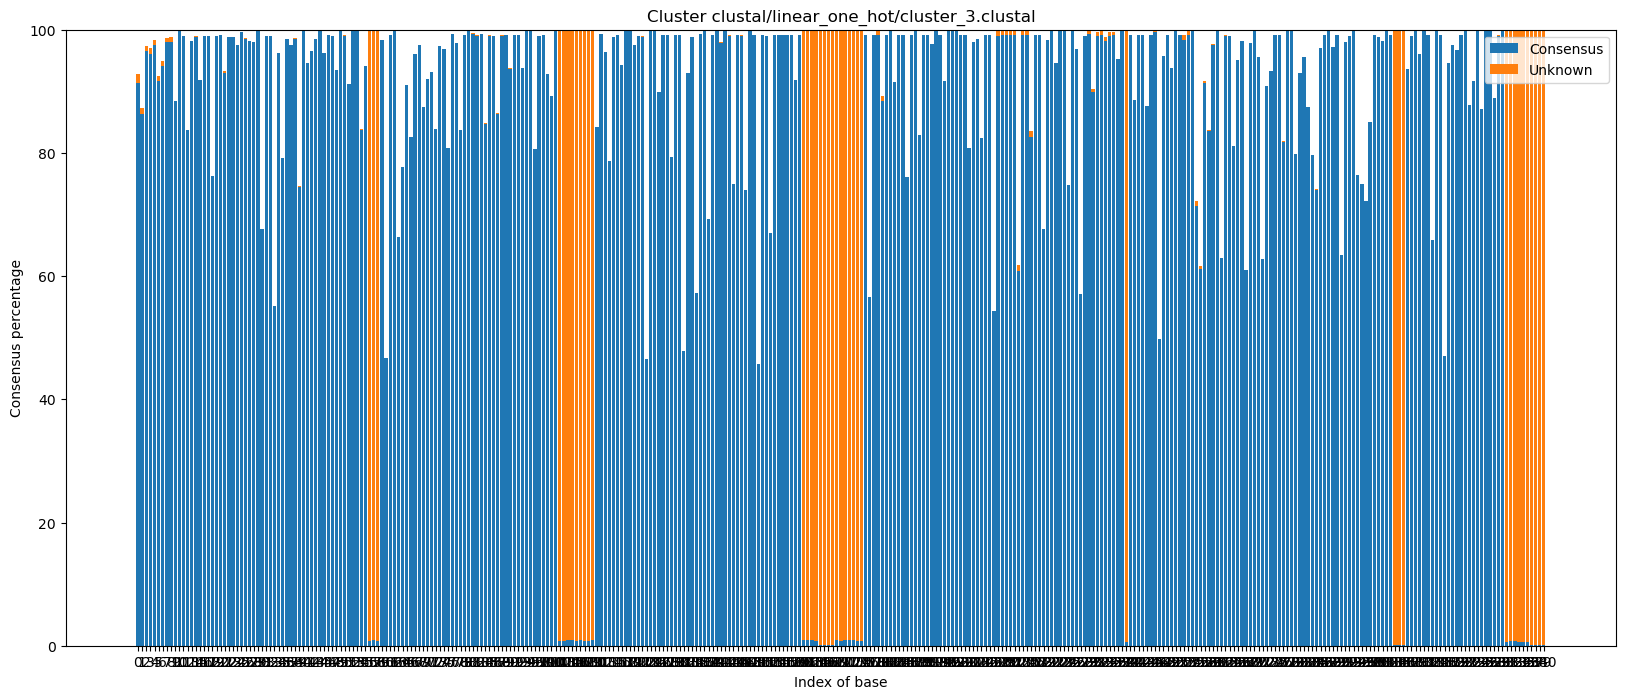

Plot for cluster 4


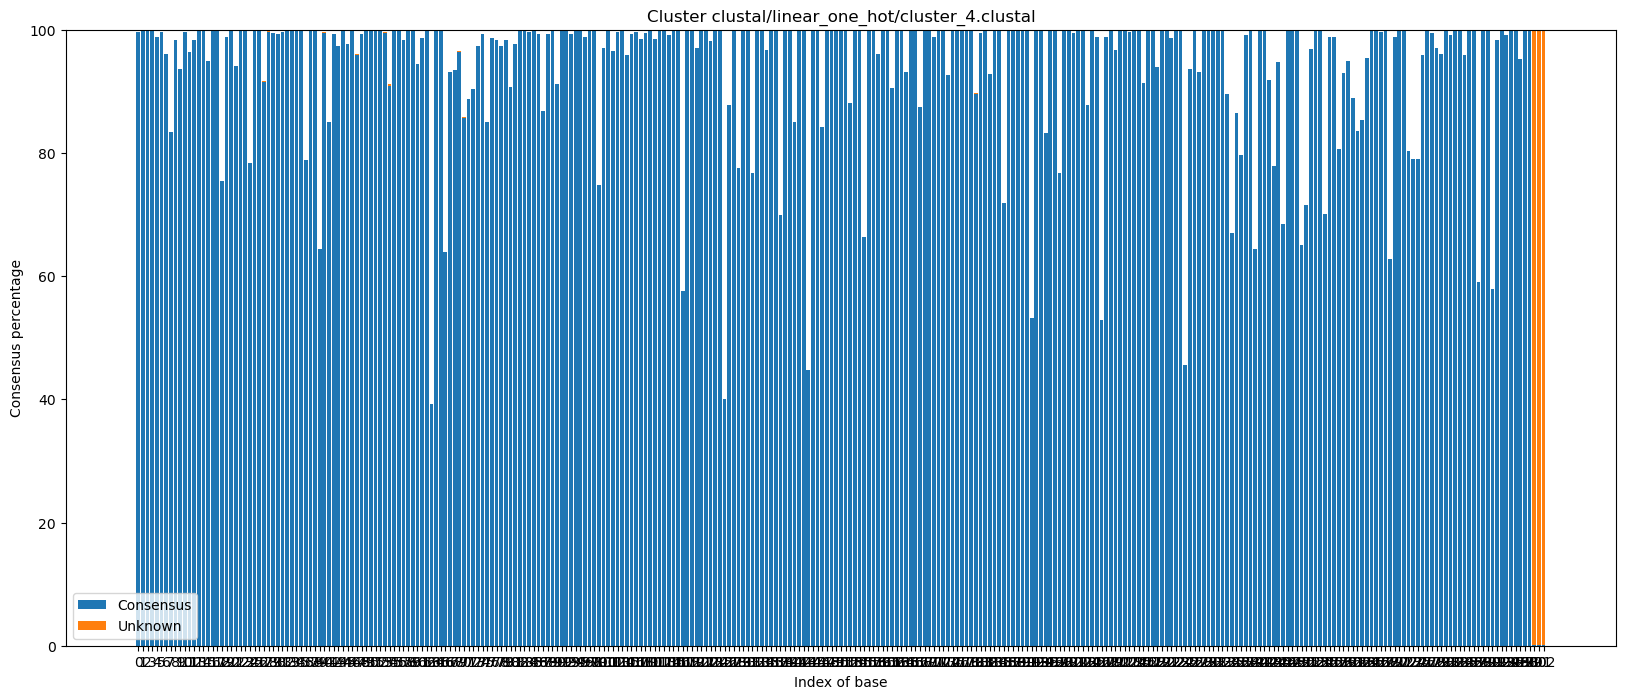

Plot for cluster 5


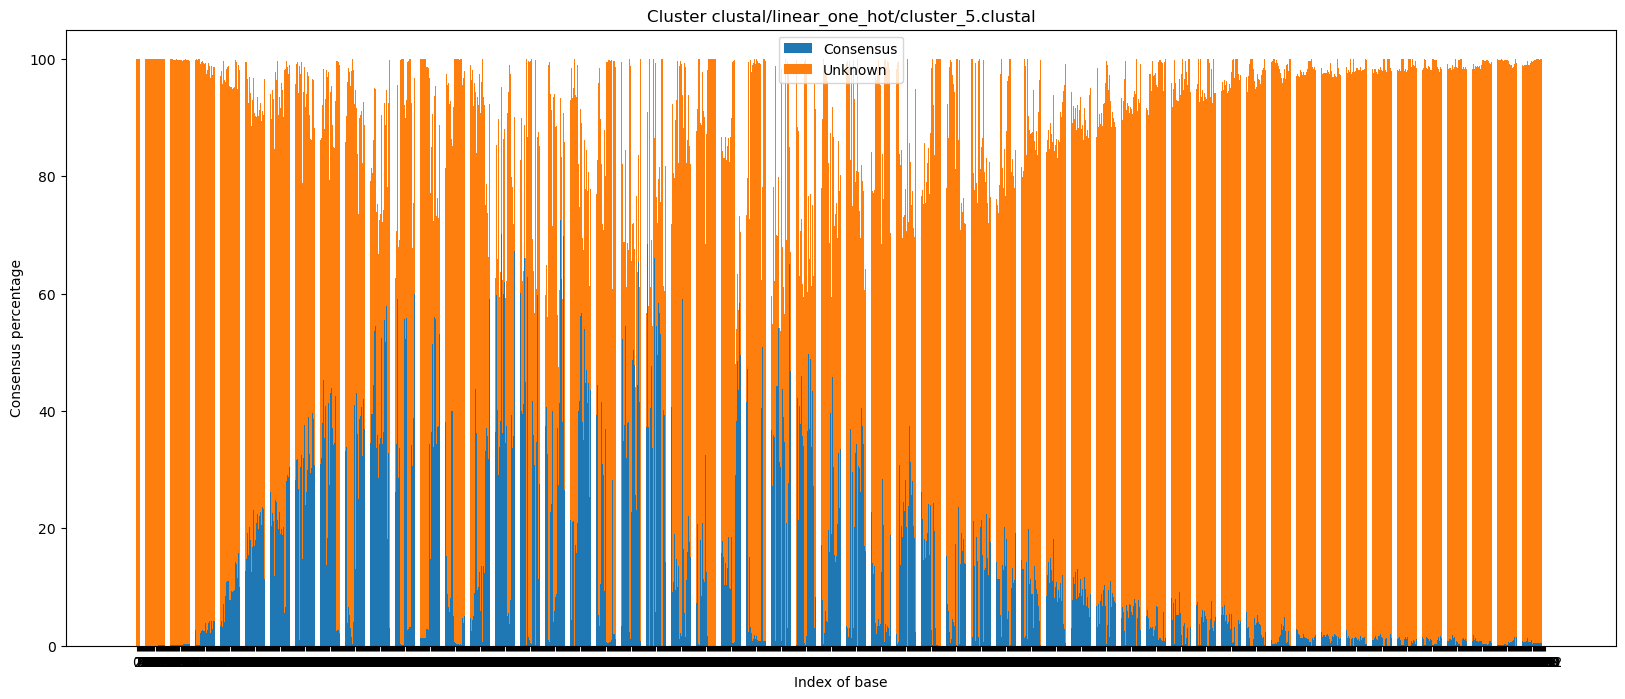

Plot for cluster 6


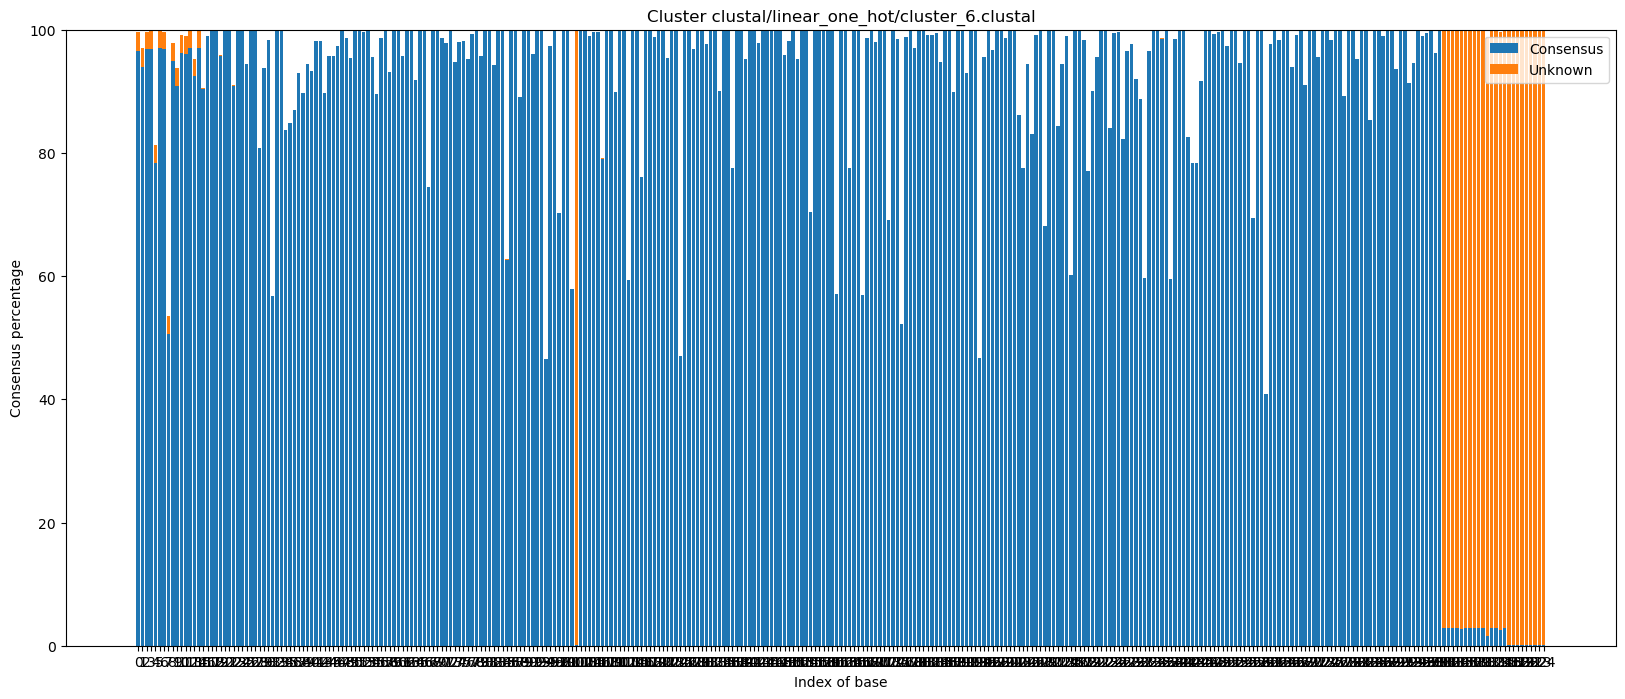

Plot for cluster 7


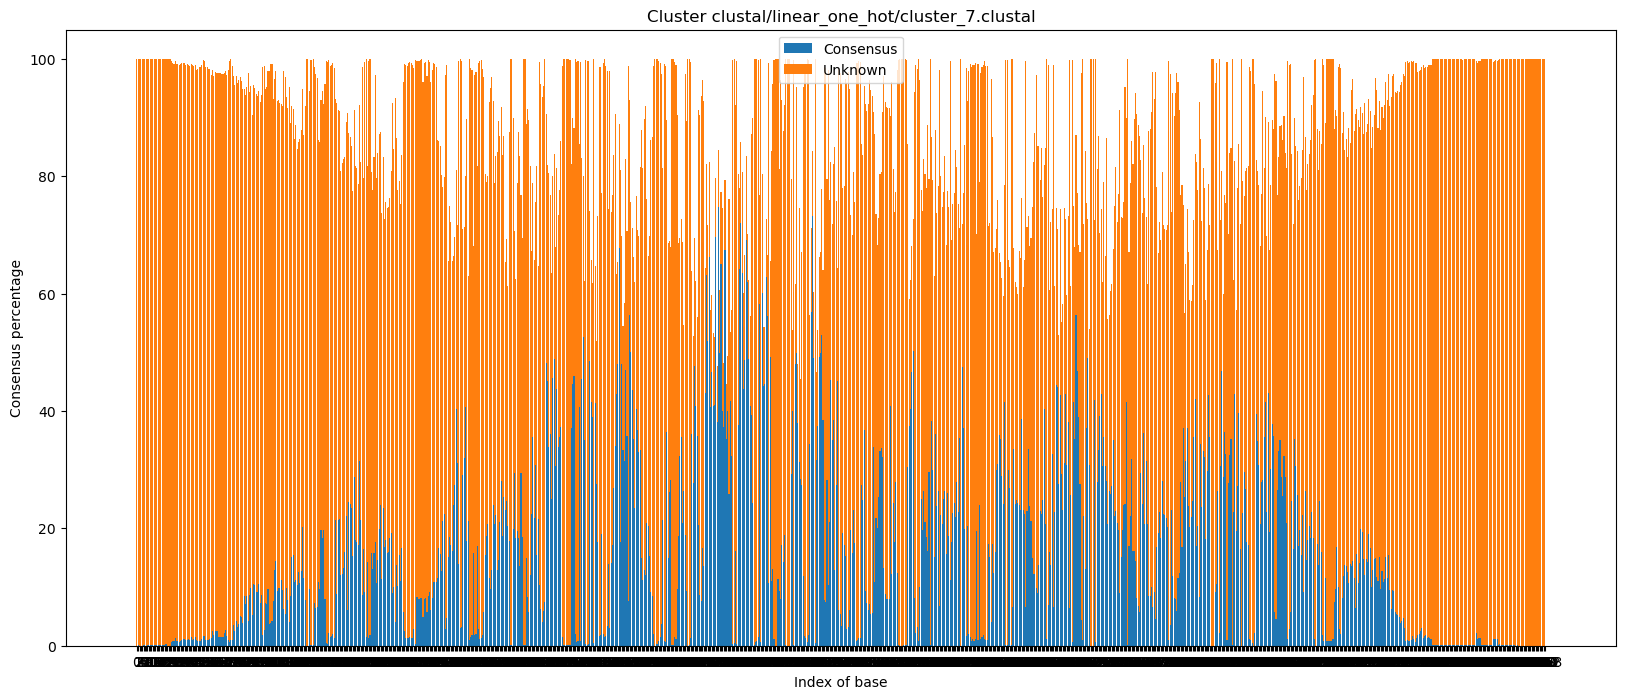

Plot for cluster 8


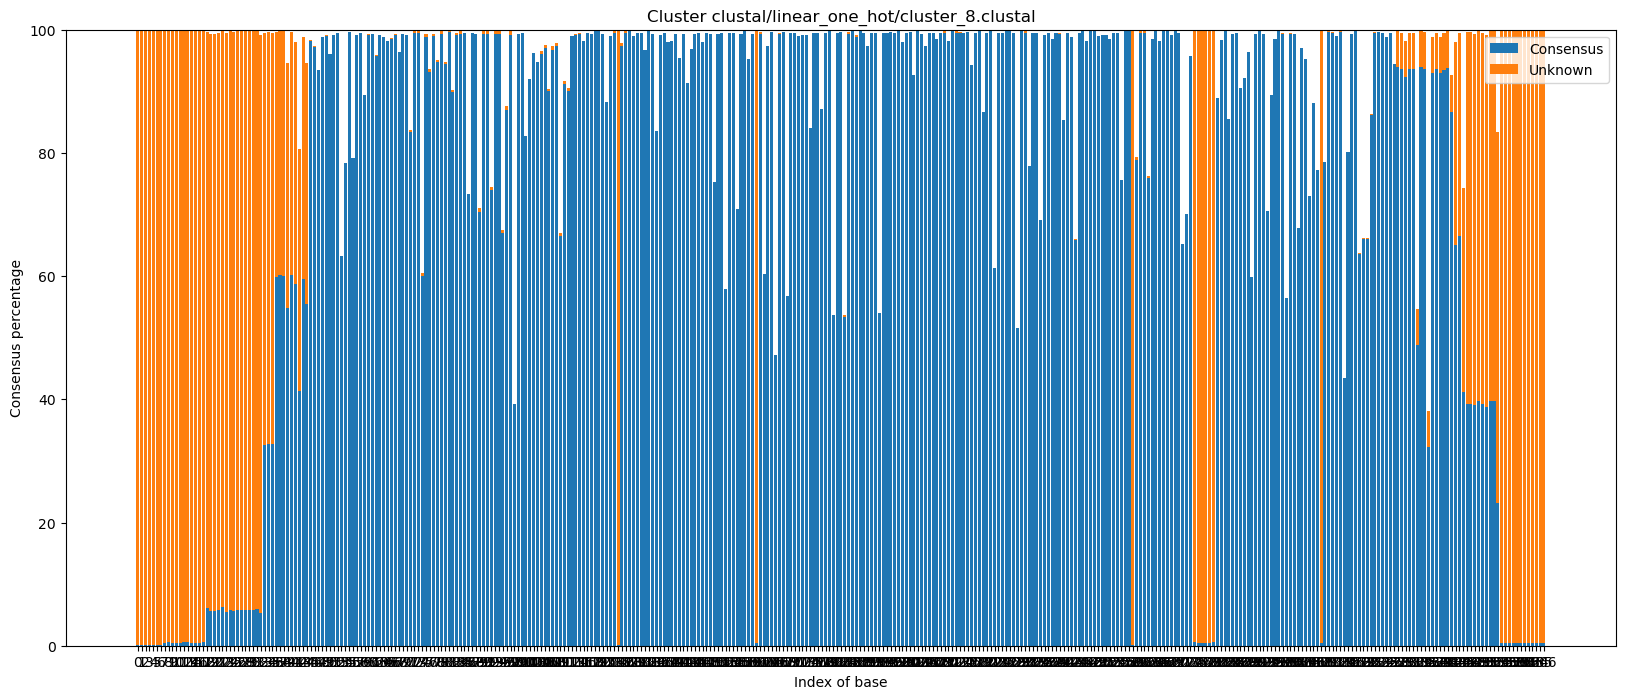

Plot for cluster 9


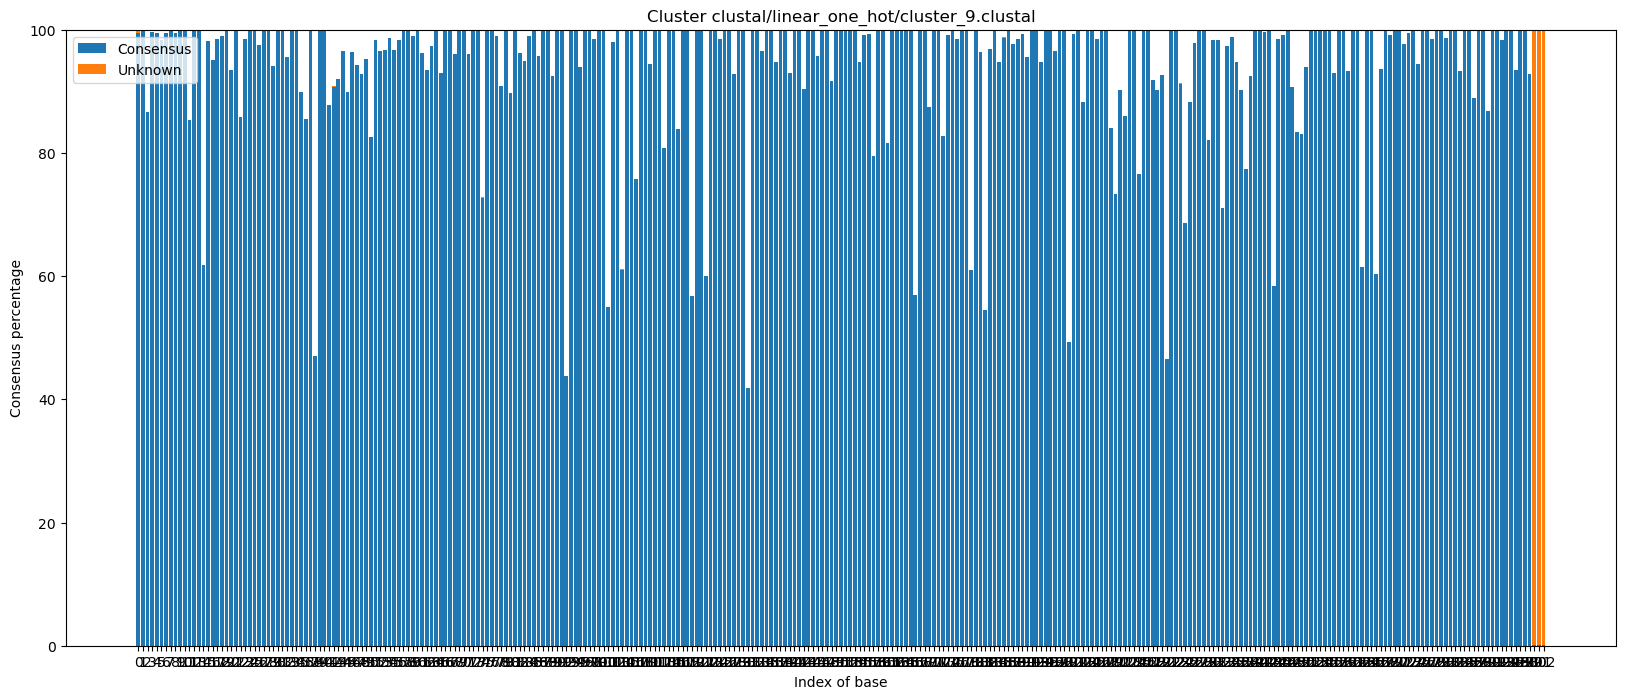

Plot for cluster 10


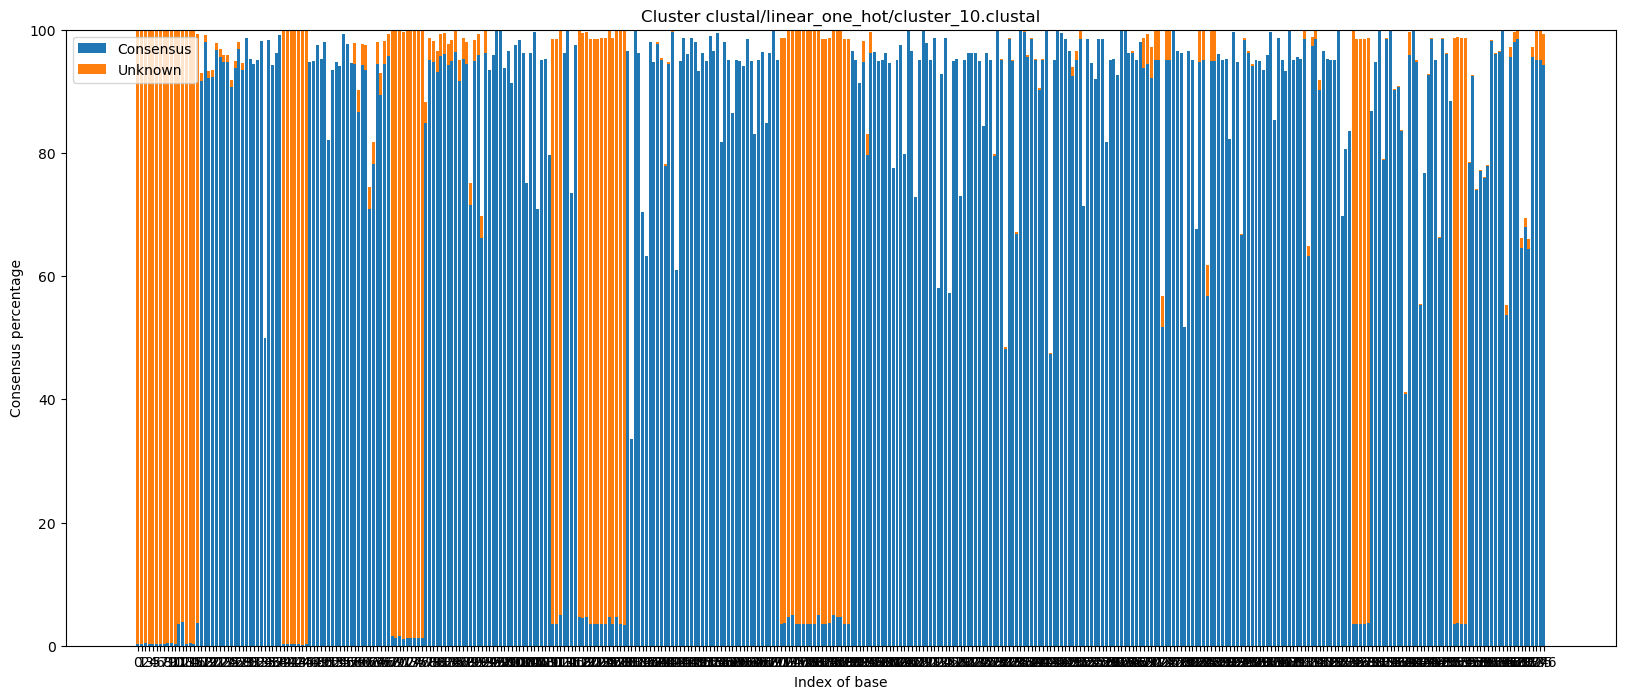

In [21]:
plotClusterRange("linear_one_hot", 0, num_clusters, unique_labels)

In [10]:
print(np.mean(percentages))
print(np.median(percentages))
print(np.std(percentages))

29.06103827713978
18.323899945225488
28.753242393748245


In [11]:
scores, normalized_scores, sum_scores, div_scores = primerExtractionScoreOnModel("linear_one_hot", cluster_labels, unique_labels, stride=1)

In [12]:
print(scores)
print(normalized_scores)
print(sum_scores)
print(div_scores)

[0, 96.8333922886452, 94.56903765690376, 94.52525252525251, 97.32546842470506, 0, 96.8031968031968, 0, 95.83194103194103, 96.44342331993107, 92.49360613810742]
[0.      5.47496 3.16428 5.24048 2.80492 0.      1.938   0.      3.90036
 3.35816 1.4466 ]
27.327759999999994
2.4843418181818175


In [13]:
np.count_nonzero(normalized_scores)/len(unique_labels)

0.7272727272727273

In [14]:
sequences_list = list(SeqIO.parse("Data/rbcL.fasta" , "fasta"))
family_count_per_cluster, family_frequencies_per_cluster = getFamiliesPerCluster(cluster_labels, unique_labels, getIDs("Data/rbcL_ids.txt"), getIDFamilyMapping(sequences_list))

In [15]:
print(family_count_per_cluster)
print(family_frequencies_per_cluster)

{0: 4939, 1: 1311, 2: 822, 3: 1019, 4: 741, 5: 4132, 6: 534, 7: 4048, 8: 845, 9: 705, 10: 364}
{0: {'occidentalis': 15, 'strictum': 9, 'ligneoriparia': 1, 'shensiensis': 6, 'verticillatum': 5, 'Wurfbainia': 43, 'virginica': 3, 'falconeri': 3, 'monosperma': 4, 'sp.': 1089, 'exacoides': 1, 'linza': 6, 'parviflora': 23, 'rubiginosa': 3, 'baicalensis': 1, 'racemosa': 29, 'ciliatum': 2, 'capitellata': 5, 'longidens': 1, 'obtusifolia': 4, 'tataricum': 13, 'orientalis': 10, 'fruticosus': 1, 'japonica': 92, 'aurantiacum': 3, 'photeinocarpum': 1, 'aeruginosa': 6, 'riopalenquense': 1, 'carajasensis': 3, 'aff.': 18, 'fastigiata': 6, 'affine': 5, 'austrosibiricus': 5, 'balcooa': 2, 'spruceana': 2, 'Trentepohliaceae': 32, 'distinctus': 10, 'pilosa': 9, 'chinensis': 76, 'barbata': 2, 'hypnoides': 1, 'helveticum': 1, 'coronata': 1, 'americanus': 3, 'africana': 19, 'Bolbitis': 2, 'pectinata': 11, 'grandiflorum': 5, 'cuneatum': 1, 'lacerulata': 1, 'morrisonicola': 1, 'calisaya': 1, 'paludica': 1, 'conf